In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

In [30]:
df = pd.read_csv('credit_card_cleaned_data.csv')

In [31]:
# See the first 5 rows of the dataset
df.head(5) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [32]:
# Find out the basic shape (# of rows and columns) of the dataset
df.shape

(26664, 30)

Here we can see that the data contains 26,664 rows and 30 columns.

In [33]:
# Calculate the basic stats of the dataset
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047,0.221797,0.352985,0.164266,0.015527,0.467222
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185,0.415463,0.477907,0.370524,0.123637,0.498934
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.020000e+02,390.000000,294.750000,242.750000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This is a good snapshot of the data that helps us spot some obvious anomalies in the data. For example, as can be seen above, the minimum age is 21, which makes sense since this is a credit-card-related dataset.

Now we can go a bit further in exploring the data. For instance, we could check the dataset for any double entries. To do that, we have to use the 'ID' column since it is the only unique column in each row.    

In [12]:
df['ID'].nunique()

26664

The important thing here is whether this number matches the total number of rows, 26664, which we found earlier using df.shape. Since the two numbers are equal, it seems that there isn't any double entries. 

We could also check the data types:
    

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
ID                            26664 non-null object
LIMIT_BAL                     26664 non-null int64
SEX                           26664 non-null int64
EDUCATION                     26664 non-null int64
MARRIAGE                      26664 non-null int64
AGE                           26664 non-null int64
PAY_1                         26664 non-null int64
PAY_2                         26664 non-null int64
PAY_3                         26664 non-null int64
PAY_4                         26664 non-null int64
PAY_5                         26664 non-null int64
PAY_6                         26664 non-null int64
BILL_AMT1                     26664 non-null int64
BILL_AMT2                     26664 non-null int64
BILL_AMT3                     26664 non-null int64
BILL_AMT4                     26664 non-null int64
BILL_AMT5                     26664 non-null int64
BILL_AMT6              

Our dataset contains two rows, 'ID' and 'EDUCATION_CAT' with 'object' type data; the rest is in 'int64' type. Again, this makes sense since the two rows have strings and the rest contains only the numbers. 

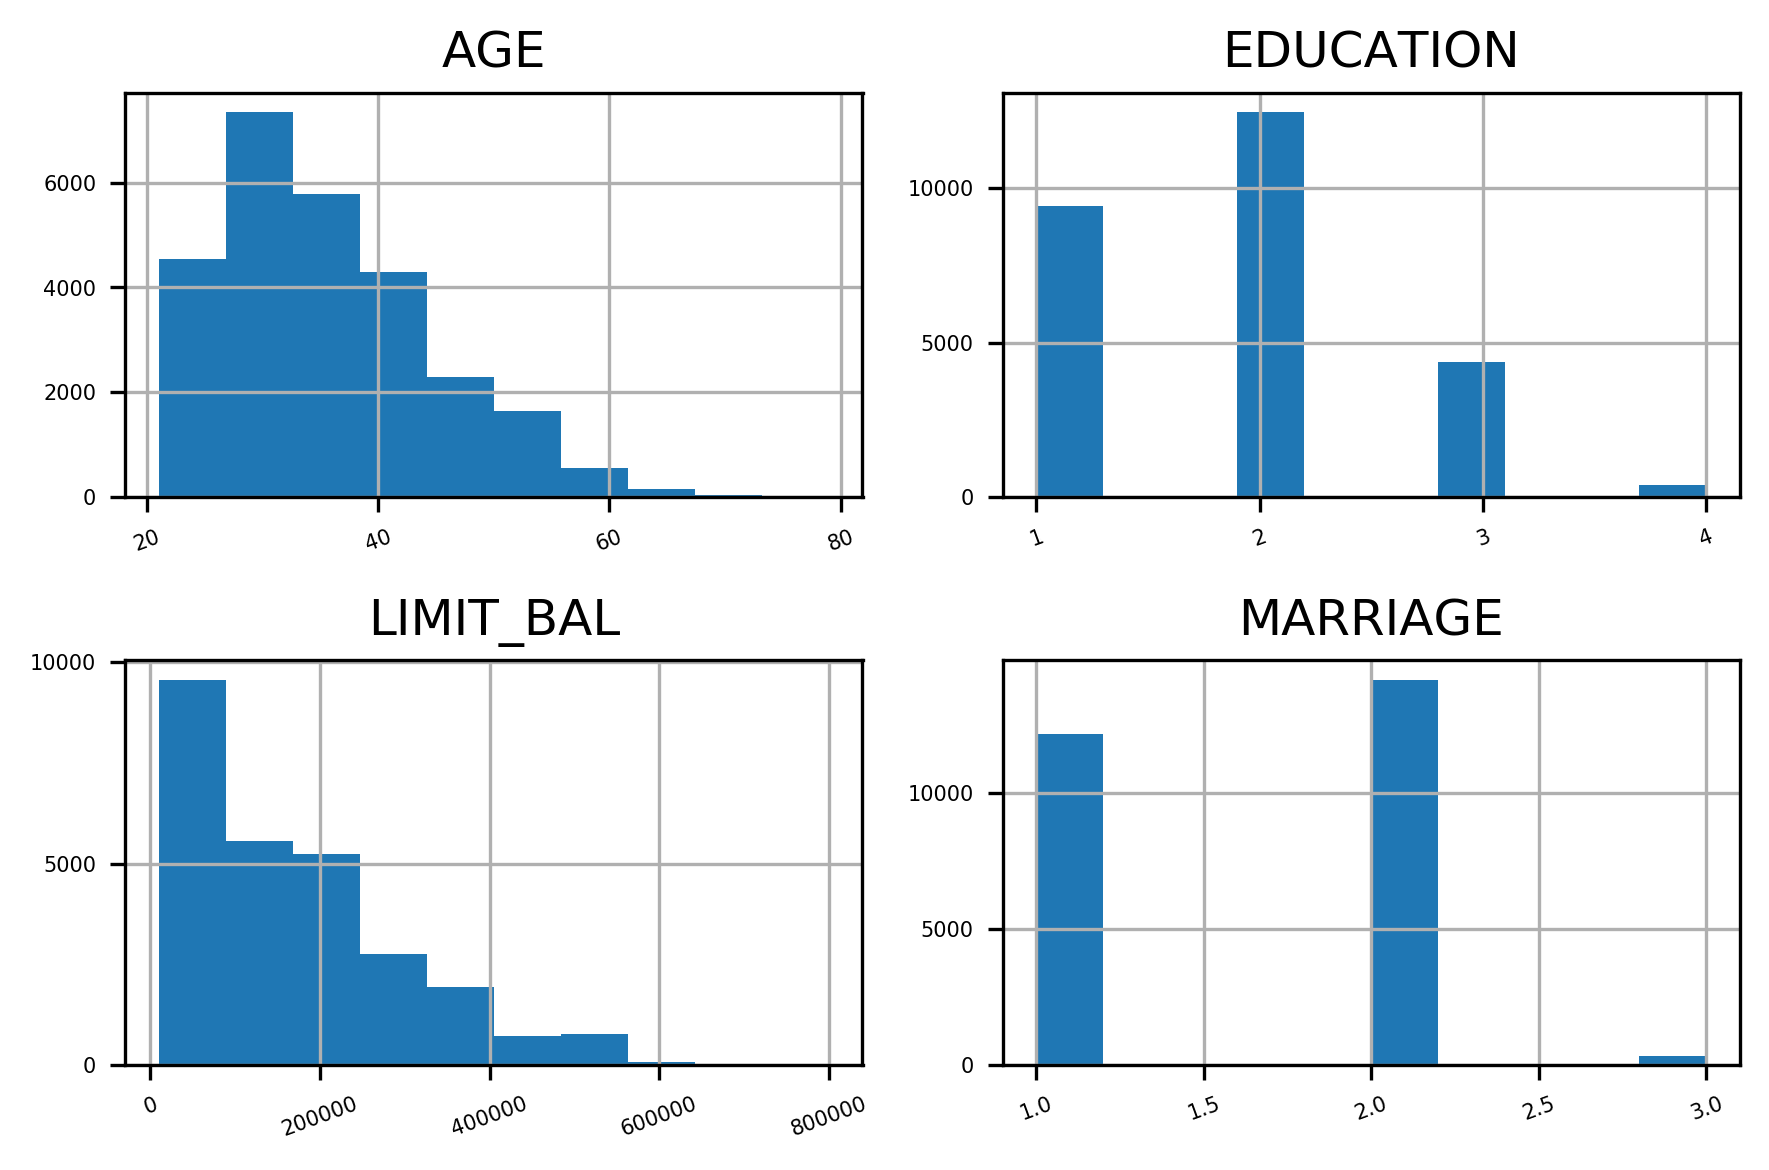

In [96]:
df[['AGE', 'EDUCATION', 'LIMIT_BAL', 'MARRIAGE']].hist(xlabelsize=5,ylabelsize=5, xrot=20)
plt.tight_layout()

This is a nice visual snapshop of these features. Useful insights inlude the dataset is overrepresentative of people who are in their mid-30s ['AGE'] and have at least a college degree ['EDUCATION'].   